In [1]:
import pandas as pd
import scipy as scp
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
train = pd.read_table('sincTrain25.dt', header = None, sep = ' ')
val = pd.read_table('sincValidate10.dt', header = None, sep = ' ')

In [14]:
train.columns = ['x', 'y']
val.columns = ['x', 'y']

In [16]:
train.head(1)

,x,y
0,5.94911,-0.108044


In [18]:
val.head(1)

,x,y
0,-4.5316,-0.228174


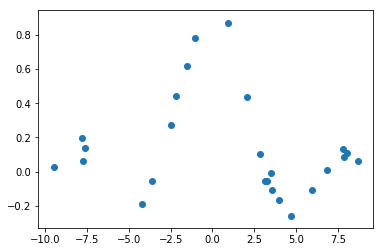

In [19]:
plt.scatter(train.x, train.y)

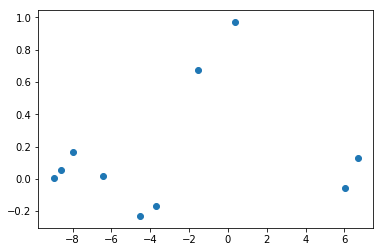

In [20]:
plt.scatter(val.x, val.y)

In [8]:
class Node :
    
    def __init__(self, weights, activation) :
        self.weights = weights
        self.activation = activation
    
    def fire(self, signal) :
        integration = scp.inner(self.weights, signal)
        return self.activation(integration)

In [5]:
def inner_node_act(a) :
    return (a / (1 + abs(a)))

In [78]:
#Put den ind som klasse metode i Network klassen
def build_network(structure, inner_activation, outer_activation) :
    
    outer_weights = scp.randn(structure[-1],structure[-2]) / 10
    
    outer_nodes =  [Node(w, outer_activation) for w in outer_weights]
    
    if (len(structure) == 2) : 
        
        return [outer_nodes]
    
    else :
        
        structure = structure[:-1]
        
        nodes = []
        
        for i in range(0, len(structure)-1) :
            
            layer_weights = scp.randn(structure[i+1],structure[i]) / 10
    
            layer_nodes =  [Node(w, inner_activation) for w in layer_weights]
            
            nodes.append(layer_nodes)
        
        nodes.append(outer_nodes)
        
        return nodes

In [39]:
class Network :

    def __init__(self, structure, inner_activation, outer_activation) :
        self.structure = structure
        self.inner_activation = inner_activation
        self.outer_activation = outer_activation
    
    def build_network(self) :
        
        outer_weights = scp.randn(self.structure[-1], self.structure[-2]) / 10
        outer_nodes =  [Node(w, self.outer_activation) for w in outer_weights]

        if (len(self.structure) == 2) : 

            self.nodes = [outer_nodes]
            
            return

        else :

            structure = self.structure[:-1]

            nodes = []

            for i in range(0, len(structure)-1) :

                layer_weights = scp.randn(structure[i+1],structure[i]) / 10

                layer_nodes =  [Node(w, self.inner_activation) for w in layer_weights]

                nodes.append(layer_nodes)

            nodes.append(outer_nodes)

            self.nodes = nodes
            
            return
    
    def empirical_loss_gradient(self, signal, labels) :
        "start by a simple forward pass"
        signals = []
        
        for layer in self.nodes :
            signal = [node.fire(signal) for node in layer]
            signals.append(signal)
            
        return signals
    
    def train(self, sample, labels) :
        "implement gradient based training"

    def predict(self, signal) : 
        for layer in self.nodes :
            signal = [node.fire(signal) for node in layer]
        return signal

In [44]:
n = Network([10,2,1], inner_node_act, lambda x : x)

In [45]:
n.build_network()

In [46]:
n.nodes

[[<__main__.Node at 0x7fd05cccbe48>, <__main__.Node at 0x7fd05ccd0550>],

In [47]:
n.empirical_loss_gradient(scp.randn(10),1)

[[0.12831478194162055, -0.14098461558293537], [-0.019339146370731853]]